In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
wine = pd.read_csv('../data/wine.csv')

wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
wine.mean()

C:\Users\YJ\AppData\Local\Temp/ipykernel_596/777327822.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wine.mean()


fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [5]:
wine.min()

type                        red
fixed acidity               3.8
volatile acidity           0.08
citric acid                 0.0
residual sugar              0.6
chlorides                 0.009
free sulfur dioxide         1.0
total sulfur dioxide        6.0
density                 0.98711
pH                         2.72
sulphates                  0.22
alcohol                     8.0
quality                       3
dtype: object

In [6]:
wine.max()

type                      white
fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
quality                       9
dtype: object

In [7]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [8]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
wine['quality'].value_counts().max()

2836

In [10]:
wine['quality'].value_counts().idxmax()

6

In [11]:
wine.groupby('type')['quality'].value_counts()

type   quality
red    5           681
       6           638
       7           199
       4            53
       8            18
       3            10
white  6          2198
       5          1457
       7           880
       8           175
       4           163
       3            20
       9             5
Name: quality, dtype: int64

In [12]:
wine_des =wine.groupby('type')['quality'].describe()

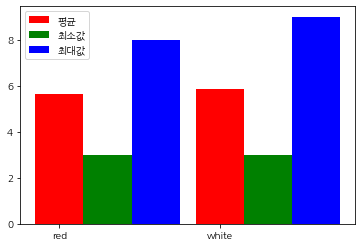

In [13]:
result = wine.groupby('type').quality.agg(['mean', 'min', 'max'])
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()

index = np.arange(n_groups) #n_groups의 크기 6만큼 배열 생성하여 index에 저장
bar_width = 0.3

#평균 값에 대한 그래프 생성
rects1 = plt.bar(index, means, bar_width, color = 'r', label = '평균')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = '최소값')
rects3 = plt.bar(index + bar_width*2, maxs, bar_width, color = 'b', label = '최대값')
plt.xticks(index, result.index.tolist())
plt.legend() #그래프에 범례를 달고 싶을 때 쓰는 함수
plt.show()


<AxesSubplot:xlabel='quality', ylabel='Count'>

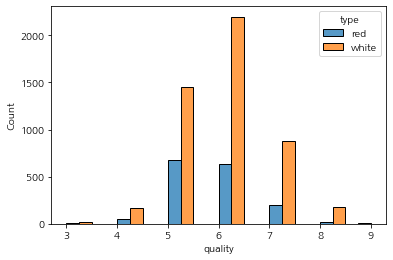

In [21]:
import seaborn as sns
sns.histplot(data = wine, x = "quality",binwidth = 0.5, hue = "type", multiple  ="dodge")

In [19]:
wine_des.to_csv('C:\\Users\\YJ\\홍륜건\\1222\\wine.csv')